```````````````````````````````````````````````````````````````````````````````````````````````````````````````````````````````````````````````````````````````````````````````````````````````````````````````````

## AVOCADO PROJECT


```````````````````````````````````````````````````````````````````````````````````````````````````````````````````````````````````````````````````````````````````````````````````````````````````````````````````

### Problem Statement:


    Avocado is a fruit consumed by people heavily in the United States
  
This data was downloaded from the Hass Avocado Board website in May of 2018 & compiled into a single CSV. 

The table below represents weekly 2018 retail scan data for National retail volume (units) and price. Retail scan data comes directly from retailers’ cash registers based on actual retail sales of Hass avocados. 

Starting in 2013, the table below reflects an expanded, multi-outlet retail data set. Multi-outlet reporting includes an aggregation of the following channels: grocery, mass, club, drug, dollar and military. The Average Price (of avocados) in the table reflects a per unit (per avocado) cost, even when multiple units (avocados) are sold in bags. 

The Product Lookup codes (PLU’s) in the table are only for Hass avocados. Other varieties of avocados (e.g. greenskins) are not included in this table.

### Inspiration /Label 

    Task is to make a model by considering the data provided that can predict the Average Price.

In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

from sklearn.model_selection import train_test_split
from sklearn.metrics import r2_score,mean_squared_error,mean_absolute_error
from sklearn.model_selection import cross_val_score

import warnings
warnings.filterwarnings('ignore')

In [2]:
data = pd.read_csv(r'C:\Users\91977\DataScienceProjects\Project_csv_files\avocado.csv')

In [3]:
data.head()

,Unnamed: 0,Date,AveragePrice,Total Volume,4046,4225,4770,Total Bags,Small Bags,Large Bags,XLarge Bags,type,year,region
0,0,2015-12-27,1.33,64236.62,1036.74,54454.85,48.16,8696.87,8603.62,93.25,0.0,conventional,2015,Albany
1,1,2015-12-20,1.35,54876.98,674.28,44638.81,58.33,9505.56,9408.07,97.49,0.0,conventional,2015,Albany
2,2,2015-12-13,0.93,118220.22,794.70,109149.67,130.50,8145.35,8042.21,103.14,0.0,conventional,2015,Albany
3,3,2015-12-06,1.08,78992.15,1132.00,71976.41,72.58,5811.16,5677.40,133.76,0.0,conventional,2015,Albany
4,4,2015-11-29,1.28,51039.60,941.48,43838.39,75.78,6183.95,5986.26,197.69,0.0,conventional,2015,Albany


- Dataset

    `Date` - The date of the observation
    
    `AveragePrice` - the average price of a single avocado
    
    `type` - conventional or organic
    
    `year` - the year
    
    `Region` - the city or region of the observation
    
    `Total Volume` - Total number of avocados sold
    
    `4046` - Total number of avocados with PLU 4046 sold
    
    `4225` - Total number of avocados with PLU 4225 sold
    
    `4770` - Total number of avocados with PLU 4770 sold

In [4]:
data.columns

Index(['Unnamed: 0', 'Date', 'AveragePrice', 'Total Volume', '4046', '4225',
       '4770', 'Total Bags', 'Small Bags', 'Large Bags', 'XLarge Bags', 'type',
       'year', 'region'],
      dtype='object')

In [5]:
#Let's check the dataset dimension
data.shape

(18249, 14)

## Statistical Summary

Let's check whether we have null values in our dataset

In [6]:
data.isna().sum()

Unnamed: 0      0
Date            0
AveragePrice    0
Total Volume    0
4046            0
4225            0
4770            0
Total Bags      0
Small Bags      0
Large Bags      0
XLarge Bags     0
type            0
year            0
region          0
dtype: int64

In [7]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 18249 entries, 0 to 18248
Data columns (total 14 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   Unnamed: 0    18249 non-null  int64  
 1   Date          18249 non-null  object 
 2   AveragePrice  18249 non-null  float64
 3   Total Volume  18249 non-null  float64
 4   4046          18249 non-null  float64
 5   4225          18249 non-null  float64
 6   4770          18249 non-null  float64
 7   Total Bags    18249 non-null  float64
 8   Small Bags    18249 non-null  float64
 9   Large Bags    18249 non-null  float64
 10  XLarge Bags   18249 non-null  float64
 11  type          18249 non-null  object 
 12  year          18249 non-null  int64  
 13  region        18249 non-null  object 
dtypes: float64(9), int64(2), object(3)
memory usage: 1.9+ MB


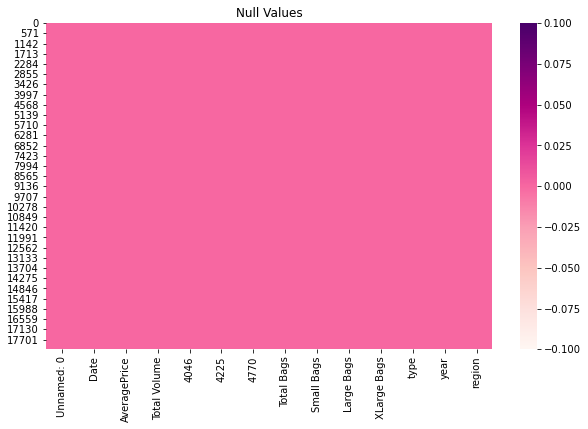

In [8]:
#Let's visualize to check the nullvalues in our dataset

plt.figure(figsize = [10,6])
sns.heatmap(data.isnull(),cmap ='RdPu')
plt.title('Null Values')
plt.show()

In [9]:
data.describe()

,Unnamed: 0,AveragePrice,Total Volume,4046,4225,4770,Total Bags,Small Bags,Large Bags,XLarge Bags,year
count,18249.000000,18249.000000,1.824900e+04,1.824900e+04,1.824900e+04,1.824900e+04,1.824900e+04,1.824900e+04,1.824900e+04,18249.000000,18249.000000
mean,24.232232,1.405978,8.506440e+05,2.930084e+05,2.951546e+05,2.283974e+04,2.396392e+05,1.821947e+05,5.433809e+04,3106.426507,2016.147899
std,15.481045,0.402677,3.453545e+06,1.264989e+06,1.204120e+06,1.074641e+05,9.862424e+05,7.461785e+05,2.439660e+05,17692.894652,0.939938
min,0.000000,0.440000,8.456000e+01,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000,2015.000000
25%,10.000000,1.100000,1.083858e+04,8.540700e+02,3.008780e+03,0.000000e+00,5.088640e+03,2.849420e+03,1.274700e+02,0.000000,2015.000000
50%,24.000000,1.370000,1.073768e+05,8.645300e+03,2.906102e+04,1.849900e+02,3.974383e+04,2.636282e+04,2.647710e+03,0.000000,2016.000000
75%,38.000000,1.660000,4.329623e+05,1.110202e+05,1.502069e+05,6.243420e+03,1.107834e+05,8.333767e+04,2.202925e+04,132.500000,2017.000000
max,52.000000,3.250000,6.250565e+07,2.274362e+07,2.047057e+07,2.546439e+06,1.937313e+07,1.338459e+07,5.719097e+06,551693.650000,2018.000000


In [10]:
data.describe().apply(lambda s: s.apply('{0:.5f}'.format))
#to check the correct data


,Unnamed: 0,AveragePrice,Total Volume,4046,4225,4770,Total Bags,Small Bags,Large Bags,XLarge Bags,year
count,18249.00000,18249.00000,18249.00000,18249.00000,18249.00000,18249.00000,18249.00000,18249.00000,18249.00000,18249.00000,18249.00000
mean,24.23223,1.40598,850644.01301,293008.42453,295154.56836,22839.73599,239639.20206,182194.68670,54338.08814,3106.42651,2016.14790
std,15.48104,0.40268,3453545.35540,1264989.08176,1204120.40114,107464.06844,986242.39922,746178.51496,243965.96455,17692.89465,0.93994
min,0.00000,0.44000,84.56000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,2015.00000
25%,10.00000,1.10000,10838.58000,854.07000,3008.78000,0.00000,5088.64000,2849.42000,127.47000,0.00000,2015.00000
50%,24.00000,1.37000,107376.76000,8645.30000,29061.02000,184.99000,39743.83000,26362.82000,2647.71000,0.00000,2016.00000
75%,38.00000,1.66000,432962.29000,111020.20000,150206.86000,6243.42000,110783.37000,83337.67000,22029.25000,132.50000,2017.00000
max,52.00000,3.25000,62505646.52000,22743616.17000,20470572.61000,2546439.11000,19373134.37000,13384586.80000,5719096.61000,551693.65000,2018.00000


- We could see that column "year" min,25%,50% of data is '0', only the rest 75% of range has some values

In [11]:
pd.set_option('display.max_rows',None)  #so that all rows can be displayed

In [12]:
data['region'].value_counts()  #region data

Charlotte              338
Philadelphia           338
Denver                 338
TotalUS                338
Plains                 338
Indianapolis           338
Albany                 338
LosAngeles             338
Syracuse               338
Chicago                338
GrandRapids            338
HarrisburgScranton     338
Tampa                  338
Detroit                338
Houston                338
StLouis                338
RaleighGreensboro      338
NewOrleansMobile       338
PhoenixTucson          338
LasVegas               338
Louisville             338
Jacksonville           338
Pittsburgh             338
BuffaloRochester       338
SouthCentral           338
Southeast              338
SouthCarolina          338
Roanoke                338
Sacramento             338
Columbus               338
Orlando                338
MiamiFtLauderdale      338
BaltimoreWashington    338
Atlanta                338
Boise                  338
Northeast              338
NorthernNewEngland     338
N

In [13]:
data['year'].value_counts() #let's check year column

2017    5722
2016    5616
2015    5615
2018    1296
Name: year, dtype: int64

- The data is only for the particular years: 2015,2016,2017,2017
- we can apply encoding in this column

### EDA (EXPLORATORY DATA ANALYSIS)

### Univariate Analysis

<AxesSubplot:title={'center':'Average Price Distribution Plot'}, xlabel='AveragePrice', ylabel='Density'>

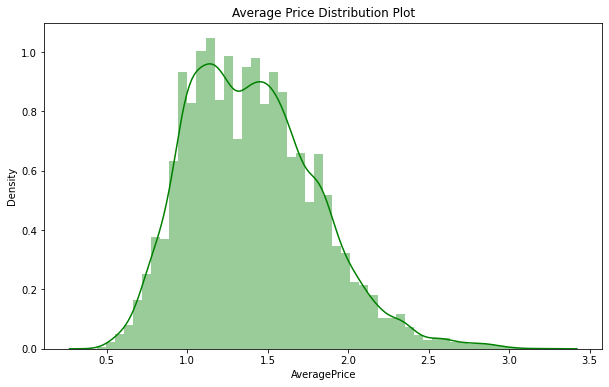

In [14]:
#Visualizing the Target variable

plt.figure(figsize=(10,6))

plt.title('Average Price Distribution Plot')
sns.distplot(data['AveragePrice'],color='Green')

- Average Price data is skewed towards right

- It means there were high fluctuations in price

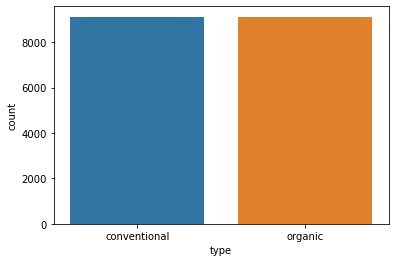

In [15]:
sns.countplot(x='type',data=data)
plt.show()

In [16]:
data['type'].value_counts()

conventional    9126
organic         9123
Name: type, dtype: int64

- We must say that we have almost equal number of Conventional and Organic Avocados sold
- Conventional Avocado sales are more than Organic Avocados by 3 in number

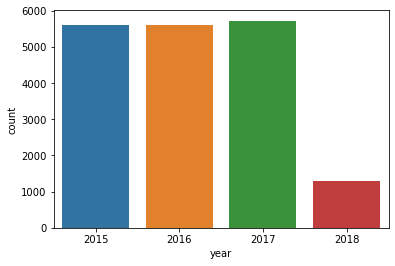

In [17]:
sns.countplot(x='year',data=data)
plt.show()

### Bivariate Analysis

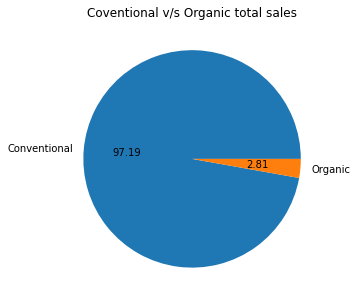

In [18]:
df1 = data.groupby(data['type']).sum()
plt.figure(figsize=(12,5))
plt.pie(df1['Total Volume'],data = df1, labels = ['Conventional','Organic'],autopct="%.2f")
plt.title('Coventional v/s Organic total sales')
plt.show()

Here, 
- 97.19% of Conventional type of Avocado were sold among the total volume of sales
    
- Rest, 2.81% of Organic Avocados were sold
    
#### Conculde: There was a high demand of Conventional Avocados between 2015-2018

<AxesSubplot:title={'center':'Total Avocados sold v/s year'}, xlabel='year', ylabel='Total Volume'>

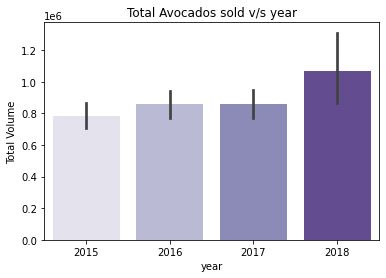

In [19]:
plt.title('Total Avocados sold v/s year')
sns.barplot(x = 'year',y = 'Total Volume',data = data,palette= 'Purples')

- Sales are trending in an increasing order since 2015

- We had more sales in 2018

In [20]:
#Check Year wise the number of avocado sold depending upon the type of Avocado

<AxesSubplot:xlabel='year', ylabel='count'>

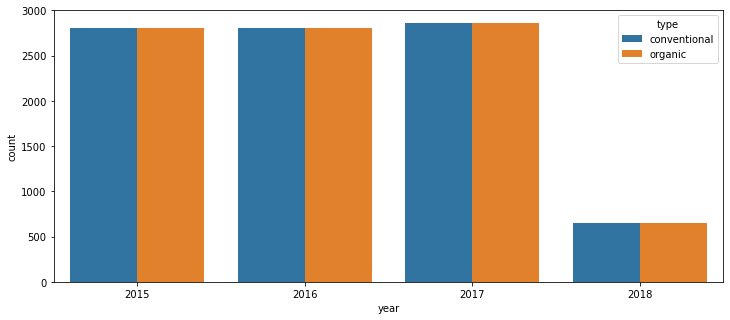

In [21]:
plt.figure(figsize=(12,5))
sns.countplot(x='year', hue='type', data= data)

##### Observation:
- We could see that both the type 'Conventional' and 'Organic' were sold equally and had equal demand between 2015-2018
- Here, there is an increasing trend od sales from 2015 to 2017 and then, a huge fall

    `2017` - had highest demand and sales
    
    `2018` - With a drastic drop, it had lowest demand sales

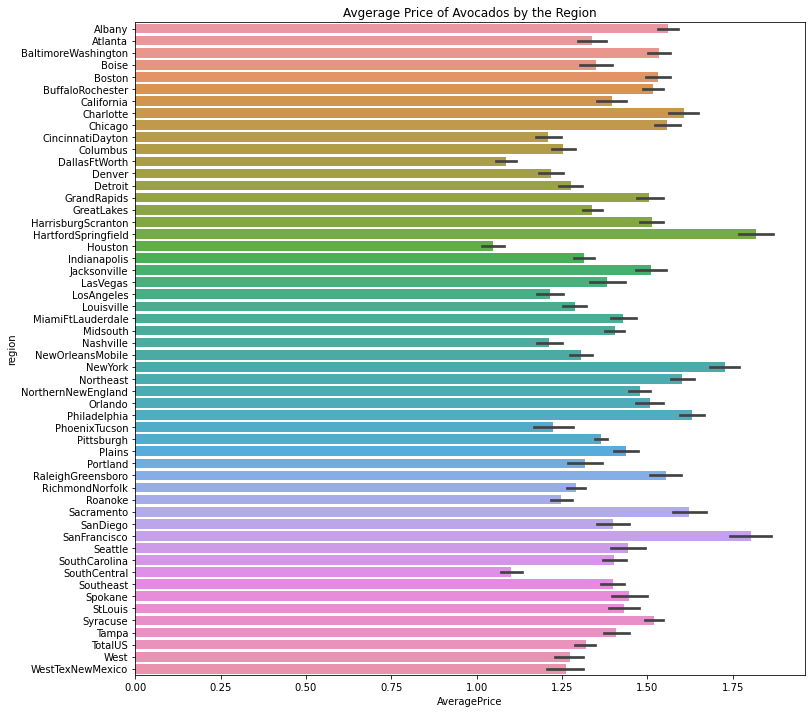

In [22]:
plt.figure(figsize=(12,12))
plt.title("Avgerage Price of Avocados by the Region")
sns.barplot(x="AveragePrice",y="region",data=data)
plt.show()

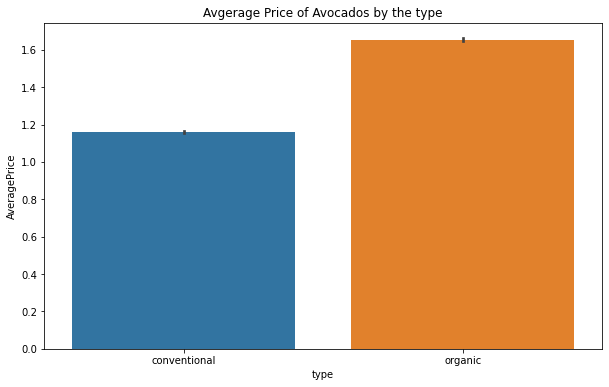

In [23]:
plt.figure(figsize=(10,6))
plt.title("Avgerage Price of Avocados by the type")
sns.barplot(x="type",y="AveragePrice",data=data)
plt.show()

- Average Price is high for Organic Avocados between 2015-2018

### Multivariate Analysis

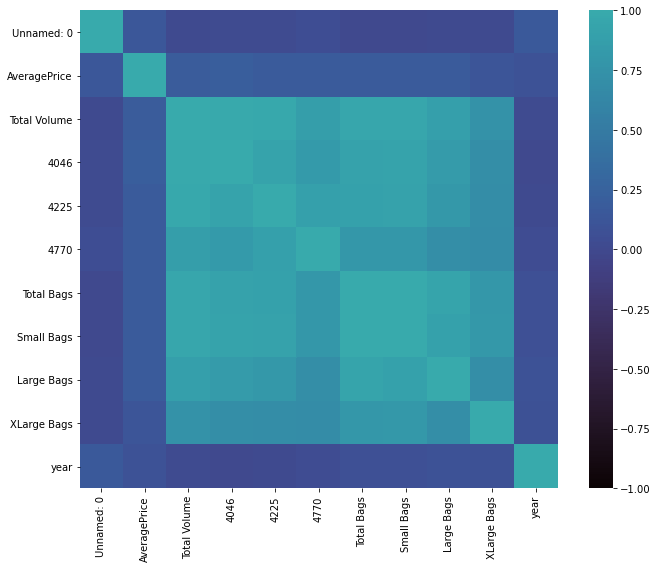

In [24]:
df2 = data.drop(columns=['type','region'])

df2_corr = df2.corr().abs() #to get the correlation values

plt.figure(figsize=(10,8))
sns.heatmap(df2_corr,vmin=-1,vmax=1,annot=False,square=True,center=0.5,fmt='.01g',linecolor='Black',cmap='mako')

plt.tight_layout()

In [25]:
data.corr()

,Unnamed: 0,AveragePrice,Total Volume,4046,4225,4770,Total Bags,Small Bags,Large Bags,XLarge Bags,year
Unnamed: 0,1.000000,-0.133008,0.014035,0.017628,0.019829,0.041752,-0.002219,0.000347,-0.009196,-0.011546,-0.171667
AveragePrice,-0.133008,1.000000,-0.192752,-0.208317,-0.172928,-0.179446,-0.177088,-0.174730,-0.172940,-0.117592,0.093197
Total Volume,0.014035,-0.192752,1.000000,0.977863,0.974181,0.872202,0.963047,0.967238,0.880640,0.747157,0.017193
4046,0.017628,-0.208317,0.977863,1.000000,0.926110,0.833389,0.920057,0.925280,0.838645,0.699377,0.003353
4225,0.019829,-0.172928,0.974181,0.926110,1.000000,0.887855,0.905787,0.916031,0.810015,0.688809,-0.009559
4770,0.041752,-0.179446,0.872202,0.833389,0.887855,1.000000,0.792314,0.802733,0.698471,0.679861,-0.036531
Total Bags,-0.002219,-0.177088,0.963047,0.920057,0.905787,0.792314,1.000000,0.994335,0.943009,0.804233,0.071552
Small Bags,0.000347,-0.174730,0.967238,0.925280,0.916031,0.802733,0.994335,1.000000,0.902589,0.806845,0.063915
Large Bags,-0.009196,-0.172940,0.880640,0.838645,0.810015,0.698471,0.943009,0.902589,1.000000,0.710858,0.087891
XLarge Bags,-0.011546,-0.117592,0.747157,0.699377,0.688809,0.679861,0.804233,0.806845,0.710858,1.000000,0.081033


#### Observation:
    
- Small Bags column are highly correlated with Total Bags with "0.994335"
- Column "4046" and "4225" are highly correlated with "Total Volume" with values "0.977863" and "0.974181" respectively
- Small Bags column are largely correlated with Total Volume with "0.967238"


### Outliers

Let's check for Outliers

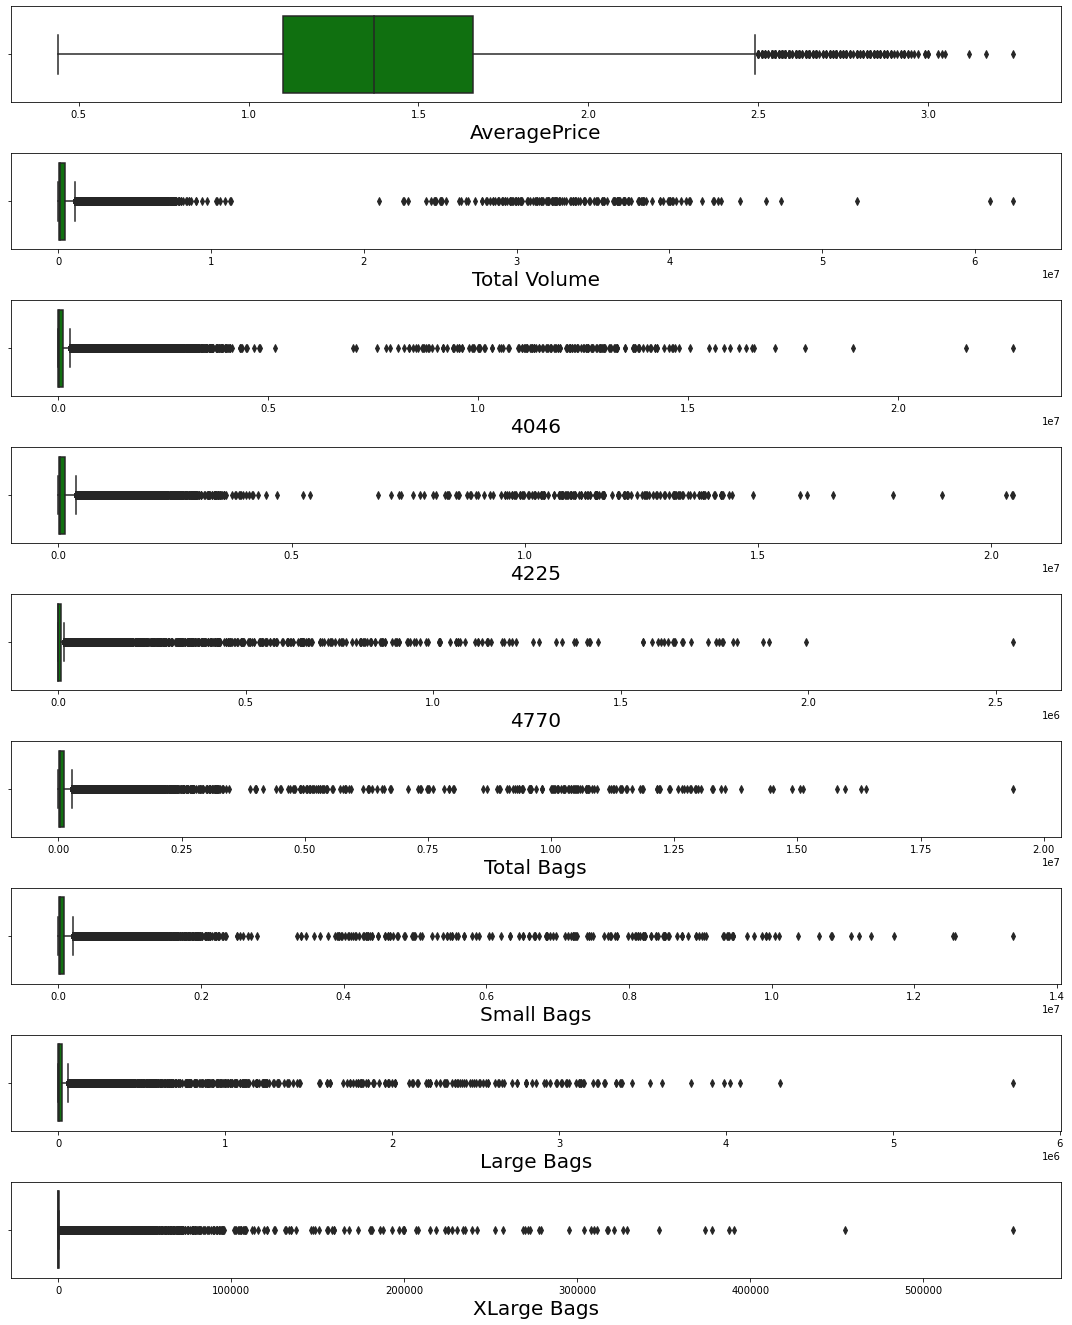

In [26]:
plt.figure(figsize = (15,20))
plotnumber = 1

for column in data.iloc[:,2:11]: #let's visualize only the features columns 
    if plotnumber<=10:
        ax = plt.subplot(10,1,plotnumber)
        sns.boxplot(data[column],color = 'Green')
        plt.xlabel(column,fontsize = 20)
    plotnumber += 1
plt.tight_layout()

- We notice that there are lagre number of outliers
- And we would need to remove them later

In [27]:
df = data.copy()

In [28]:
df['month'] = pd.DatetimeIndex(df['Date']).month
df['day'] = pd.DatetimeIndex(df['Date']).day


- The year mentioned in the Date column must be same as the year mentioned in the year column
- Hence, not extracting the year from column Date as we already have them

In [29]:
#Let's drop column 'Date' 
#Let's remove 'Unnamed: 0' column as it shows an index range

df = df.drop(columns = ['Date','Unnamed: 0'])

### Removing Outlier's and Skewness

In [30]:
from scipy import stats
def outliers(df):
    for col in df.columns:
        if((df[col].dtype == 'float64') | (df[col].dtype == 'float64')):
            percentile = df[col].quantile([0.25, 0.75]).values
            Q1 = percentile[0]
            Q3 = percentile[1]
            IQR = stats.iqr(df[col], interpolation='midpoint')
            up_lim = Q3+1.5*IQR
            low_lim = Q1-1.5*IQR
            df[col] = np.where(df[col] < low_lim, Q1, df[col])
            df[col] = np.where(df[col] > up_lim, Q3, df[col])
        else:
            df[col] = df[col]
    return df

df_new = outliers(df)

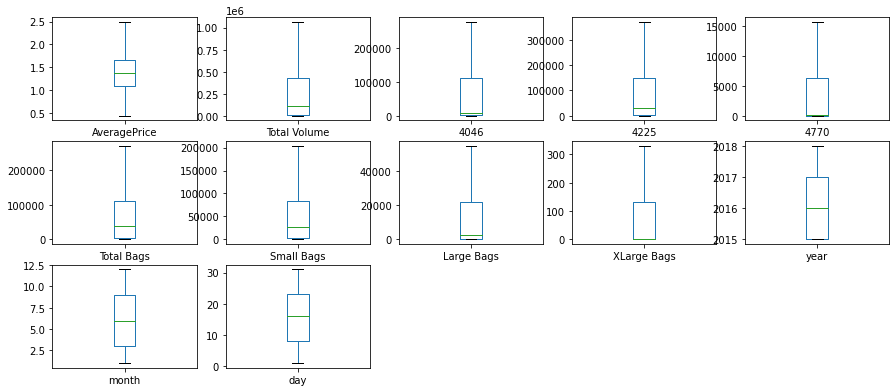

In [31]:
df_new.plot(kind='box', subplots=True, layout=(5,5), sharex=False, legend=False, figsize=(15,11))
plt.show()

In [32]:
df_new.skew()

AveragePrice    0.318107
Total Volume    1.218168
4046            1.243002
4225            1.336790
4770            1.508574
Total Bags      1.025640
Small Bags      1.013666
Large Bags      1.377942
XLarge Bags     1.430140
year            0.215339
month           0.106617
day             0.014310
dtype: float64

In [33]:
for index in df_new.skew().index:
    if df_new.skew().loc[index]>0.55:
        df_new[index] = np.sqrt(df_new[index])

In [34]:
df_new.skew()

AveragePrice    0.318107
Total Volume    0.422142
4046            0.560666
4225            0.500860
4770            0.753816
Total Bags      0.209672
Small Bags      0.200212
Large Bags      0.545137
XLarge Bags     0.987027
year            0.215339
month           0.106617
day             0.014310
dtype: float64

## Encoding data

In [35]:
from sklearn.preprocessing import LabelEncoder
l_enc = LabelEncoder()
df_new['type'] = l_enc.fit_transform(df_new['type'])
df_new['year'] = l_enc.fit_transform(df_new['year'])

In [36]:
region = pd.get_dummies(df_new.region)
df_new = pd.concat([df_new, region], axis='columns')
df_new.drop('region', axis=1, inplace=True)

### Splitting Features and Labels

In [37]:
X = df_new.drop(columns = 'AveragePrice')
Y = df_new['AveragePrice']

## Scaling 

In [38]:
from sklearn.preprocessing import StandardScaler
Scaler = StandardScaler()

X_scaled = Scaler.fit_transform(X)

### Finding Best Random State

In [39]:
from sklearn.linear_model import LinearRegression

maxR2_Score = 0
maxRS = 0

for i in range(100):
    x_train,x_test,y_train,y_test = train_test_split(X_scaled,Y,test_size = 0.20,random_state = i)
    LR = LinearRegression()
    LR.fit(x_train,y_train)
    predrf = LR.predict(x_test)
    Score = r2_score(y_test,predrf)
    if Score>maxR2_Score:
        maxR2_Score = Score
        maxRS = i
        
print('The best accuracy is ',maxR2_Score, ' with Random State ',maxRS)

The best accuracy is  0.6515681889371472  with Random State  50


### Train Test Split

In [40]:
from sklearn.model_selection import train_test_split


x_train,x_test,y_train,y_test = train_test_split(X_scaled,Y,test_size = 0.20,random_state = maxRS)

# Model Building

In [41]:
#Importing Libraries

from sklearn.ensemble import RandomForestRegressor
from sklearn.neighbors import KNeighborsRegressor
from sklearn.ensemble import AdaBoostRegressor
from sklearn.ensemble import GradientBoostingRegressor
from sklearn.linear_model import Ridge,BayesianRidge,ElasticNet,HuberRegressor,LinearRegression
from sklearn.metrics import mean_squared_error

#### Model1: LinearRegression

R2: 0.6515681889371472
MAE: 0.17579623230165603
MSE: 0.05145335125284055
RMSE: 0.2268333116031253
Cross validation Score:  0.2967925496727962


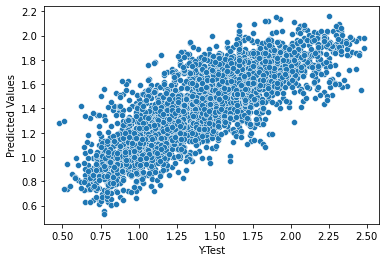

In [42]:
lr=LinearRegression()
lr.fit(x_train,y_train)
predlr=lr.predict(x_test)
sns.scatterplot(y_test,predlr)
plt.xlabel("Y-Test")
plt.ylabel("Predicted Values")
print('R2: {}'.format(r2_score(y_test, predlr)))
print('MAE: {}'.format(mean_absolute_error(y_test, predlr)))
print('MSE: {}'.format(mean_squared_error(y_test, predlr)))
print('RMSE: {}'.format(np.sqrt(mean_squared_error(y_test, predlr))))
print('Cross validation Score: ', cross_val_score(lr,X_scaled,Y,cv=5).mean())

### Model2: GradientBoostingRegressor

R Squared (R2): 0.7474791190758086
Mean Absolute Error (MAE): 0.14987874257676453
Mean Squared Error (MSE): 0.03729006701550956
Root Mean Squared Error (RMSE): 0.19310636192396552
Cross validation Score:  0.39275614334488623


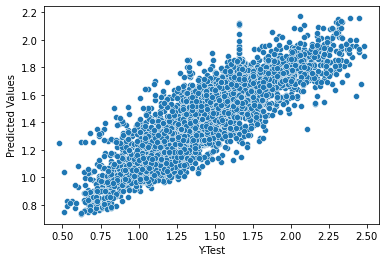

In [43]:
gb=GradientBoostingRegressor()
gb.fit(x_train,y_train)
predgb=gb.predict(x_test)
sns.scatterplot(y_test,predgb)
plt.xlabel("Y-Test")
plt.ylabel("Predicted Values")
print('R Squared (R2): {}'.format(r2_score(y_test, predgb)))
print('Mean Absolute Error (MAE): {}'.format(mean_absolute_error(y_test, predgb)))
print('Mean Squared Error (MSE): {}'.format(mean_squared_error(y_test, predgb)))
print('Root Mean Squared Error (RMSE): {}'.format(np.sqrt(mean_squared_error(y_test, predgb))))
print('Cross validation Score: ', cross_val_score(gb,X_scaled,Y,cv=5).mean())

### Model3: AdaBoostRegressor

R Squared (R2): 0.5944453426460717
Mean Absolute Error (MAE): 0.1978951284625984
Mean Squared Error (MSE): 0.05988875175720649
Root Mean Squared Error (RMSE): 0.24472178439445574
Cross validation Score:  0.09633105577731083


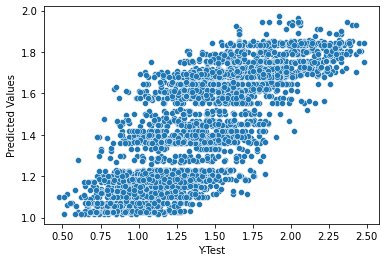

In [44]:
adb=AdaBoostRegressor()
adb.fit(x_train,y_train)
predadb=adb.predict(x_test)
sns.scatterplot(y_test,predadb)
plt.xlabel("Y-Test")
plt.ylabel("Predicted Values")
print('R Squared (R2): {}'.format(r2_score(y_test, predadb)))
print('Mean Absolute Error (MAE): {}'.format(mean_absolute_error(y_test, predadb)))
print('Mean Squared Error (MSE): {}'.format(mean_squared_error(y_test, predadb)))
print('Root Mean Squared Error (RMSE): {}'.format(np.sqrt(mean_squared_error(y_test, predadb))))
print('Cross validation Score: ', cross_val_score(adb,X_scaled,Y,cv=5).mean())

### Model4: RandomForestRegressor

R Squared (R2): 0.8964263038249536
Mean Absolute Error (MAE): 0.08827750684931505
Mean Squared Error (MSE): 0.015294854260273974
Root Mean Squared Error (RMSE): 0.12367236659930939
Cross validation Score:  0.2765712859936273


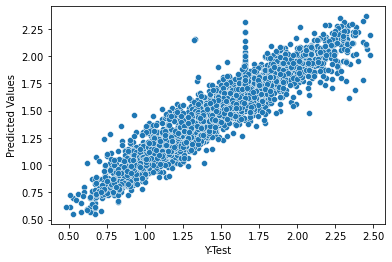

In [45]:

rand=RandomForestRegressor()
rand.fit(x_train,y_train)
predrand=rand.predict(x_test)
sns.scatterplot(y_test,predrand)
plt.xlabel("Y-Test")
plt.ylabel("Predicted Values")
print('R Squared (R2): {}'.format(r2_score(y_test, predrand)))
print('Mean Absolute Error (MAE): {}'.format(mean_absolute_error(y_test, predrand)))
print('Mean Squared Error (MSE): {}'.format(mean_squared_error(y_test, predrand)))
print('Root Mean Squared Error (RMSE): {}'.format(np.sqrt(mean_squared_error(y_test, predrand))))
print('Cross validation Score: ', cross_val_score(rand,X_scaled,Y,cv=5).mean())

### Model5: Ridge

R Squared (R2): 0.6515559337863592
Mean Absolute Error (MAE): 0.17579069878574405
Mean Squared Error (MSE): 0.05145516098593072
Root Mean Squared Error (RMSE): 0.22683730069353833
Cross validation Score:  0.2966344677881177


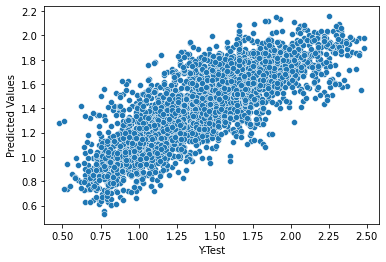

In [46]:

rdg=Ridge()
rdg.fit(x_train,y_train)
predrdg=rdg.predict(x_test)
sns.scatterplot(y_test,predrdg)
plt.xlabel("Y-Test")
plt.ylabel("Predicted Values")
print('R Squared (R2): {}'.format(r2_score(y_test, predrdg)))
print('Mean Absolute Error (MAE): {}'.format(mean_absolute_error(y_test, predrdg)))
print('Mean Squared Error (MSE): {}'.format(mean_squared_error(y_test, predrdg)))
print('Root Mean Squared Error (RMSE): {}'.format(np.sqrt(mean_squared_error(y_test, predrdg))))
print('Cross validation Score: ', cross_val_score(rdg,X_scaled,Y,cv=5).mean())

### Model6: HuberRegressor

R Squared (R2): 0.649168000501334
Mean Absolute Error (MAE): 0.17483368957683032
Mean Squared Error (MSE): 0.05180779001170181
Root Mean Squared Error (RMSE): 0.22761324656465365
Cross validation Score:  0.30059243685406917


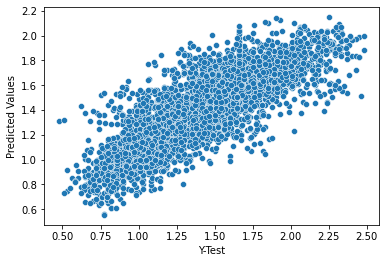

In [47]:
hb=HuberRegressor()
hb.fit(x_train,y_train)
predhb=hb.predict(x_test)
sns.scatterplot(y_test,predhb)
plt.xlabel("Y-Test")
plt.ylabel("Predicted Values")
print('R Squared (R2): {}'.format(r2_score(y_test, predhb)))
print('Mean Absolute Error (MAE): {}'.format(mean_absolute_error(y_test, predhb)))
print('Mean Squared Error (MSE): {}'.format(mean_squared_error(y_test, predhb)))
print('Root Mean Squared Error (RMSE): {}'.format(np.sqrt(mean_squared_error(y_test, predhb))))
print('Cross validation Score: ', cross_val_score(hb,X_scaled,Y,cv=5).mean())

### Model7: BayesianRidge

R Squared (R2): 0.6517069864133778
Mean Absolute Error (MAE): 0.17569308882886525
Mean Squared Error (MSE): 0.05143285485994313
Root Mean Squared Error (RMSE): 0.22678812768737064
Cross validation Score:  0.2982807999925322


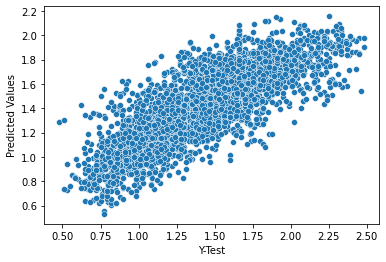

In [48]:
by=BayesianRidge()
by.fit(x_train,y_train)
predby=by.predict(x_test)
sns.scatterplot(y_test,predby)
plt.xlabel("Y-Test")
plt.ylabel("Predicted Values")
print('R Squared (R2): {}'.format(r2_score(y_test, predby)))
print('Mean Absolute Error (MAE): {}'.format(mean_absolute_error(y_test, predby)))
print('Mean Squared Error (MSE): {}'.format(mean_squared_error(y_test, predby)))
print('Root Mean Squared Error (RMSE): {}'.format(np.sqrt(mean_squared_error(y_test, predby))))
print('Cross validation Score: ', cross_val_score(by,X_scaled,Y,cv=5).mean())

Let's check the overall scores

In [49]:
#R2 score of all the models
R1 = r2_score(y_test, predlr)
R2 = r2_score(y_test, predgb)
R3 = r2_score(y_test, predadb)
R4 = r2_score(y_test, predrand)
R5 = r2_score(y_test, predrdg)
R6 = r2_score(y_test, predhb)
R7 = r2_score(y_test, predby)


#Cross Validation Score of all the models
C1 = cross_val_score(lr,X_scaled,Y,cv=5).mean()
C2 = cross_val_score(gb,X_scaled,Y,cv=5).mean()
C3 = cross_val_score(adb,X_scaled,Y,cv=5).mean()
C4 = cross_val_score(rand,X_scaled,Y,cv=5).mean()
C5 = cross_val_score(rdg,X_scaled,Y,cv=5).mean()
C6 = cross_val_score(hb,X_scaled,Y,cv=5).mean()
C7 = cross_val_score(by,X_scaled,Y,cv=5).mean()


In [120]:

Overall_Score = pd.DataFrame({'Model':['Linear Regression','Gradient Boosting Regressor','AdaBoostRegressor','Random Forest Regressor','Ridge','HuberRegressor','BayesianRidge'],'R2_Score':[R1,R2,R3,R4,R5,R6,R7],'Cross_Validation_Score':[C1,C2,C3,C4,C5,C6,C7]})
Overall_Score['Difference'] = Overall_Score['R2_Score'] - Overall_Score['Cross_Validation_Score']

In [121]:
Overall_Score

,Model,R2_Score,Cross_Validation_Score,Difference
0,Linear Regression,0.651568,0.296793,0.354776
1,Gradient Boosting Regressor,0.747479,0.392597,0.354882
2,AdaBoostRegressor,0.594445,0.086229,0.508216
3,Random Forest Regressor,0.896426,0.278798,0.617628
4,Ridge,0.651556,0.296634,0.354921
5,HuberRegressor,0.649168,0.300592,0.348576
6,BayesianRidge,0.651707,0.298281,0.353426


In [122]:
Overall_Score['Difference'].min()

0.3485755636472649

In [124]:
Overall_Score[Overall_Score['Difference'] == 0.3485755636472649]

,Model,R2_Score,Cross_Validation_Score,Difference
5,HuberRegressor,0.649168,0.300592,0.348576


###### Hence,HuberRegressor is our best model

,y_test,Pred
6039,1.21,1.230412
4607,1.17,1.087978
16117,1.61,1.583192
11391,2.01,1.624124
9152,2.02,1.703234


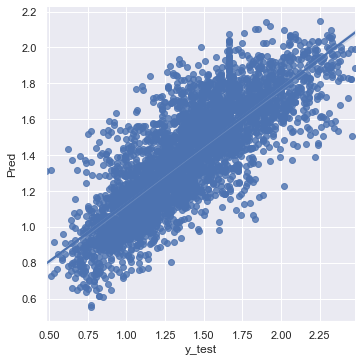

In [161]:
sns.set(font_scale = 1)
data = pd.DataFrame({'y_test':y_test , 'Pred':predhb},columns=['y_test','Pred'])
sns.lmplot(x='y_test',y='Pred',data=data,palette='rainbow')
data.head()

## Hyper Parameter Tuning

In [130]:
from sklearn.model_selection import GridSearchCV

param_grid = {'alpha':[0.9,1.0],'fit_intercept':[True,False],'max_iter':[50,100],
              'epsilon':[1.2,1.35,1.45,1.6],'warm_start':[True]}

gridsearch=GridSearchCV(estimator = HuberRegressor(), param_grid = param_grid,cv=5)     

gridsearch.fit(x_train,y_train)
print(gridsearch.best_score_, gridsearch.best_params_)

0.6235147922872872 {'alpha': 0.9, 'epsilon': 1.6, 'fit_intercept': True, 'max_iter': 50, 'warm_start': True}


In [153]:
HB_final = HuberRegressor(alpha = 0.9, fit_intercept = True, max_iter = 50,epsilon = 1.6,warm_start=True)

HB_final.fit(x_train,y_train)

y_pred = HB_final.predict(x_test)

#### Before Tuning

,Actual,Predictions
6039,1.21,1.230412
4607,1.17,1.087978
16117,1.61,1.583192
11391,2.01,1.624124
9152,2.02,1.703234
13765,1.76,1.669904
9551,1.61,1.856709
5058,1.03,1.137344
14594,1.63,1.490428
5894,1.53,1.421778


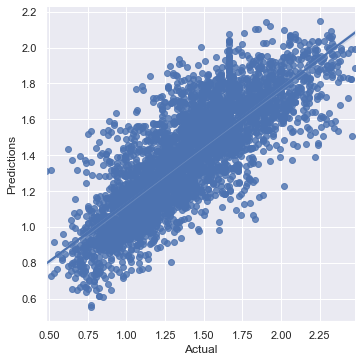

In [154]:
data_view1 = pd.DataFrame({'Actual':y_test , 'Predictions':predhb},columns=['Actual','Predictions'])
sns.lmplot(x='Actual',y='Predictions',data=data_view1,palette='rainbow')
data_view1

#### After Tuning

,Y Test,Pred
6039,1.21,1.234293
4607,1.17,1.099328
16117,1.61,1.581161
11391,2.01,1.636028
9152,2.02,1.687073
13765,1.76,1.674685
9551,1.61,1.865968
5058,1.03,1.155383
14594,1.63,1.492500
5894,1.53,1.429157


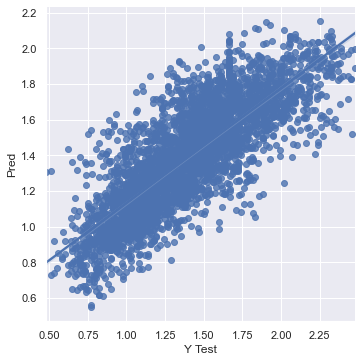

In [155]:
data_view2 = pd.DataFrame({'Y Test':y_test , 'Pred':y_pred},columns=['Y Test','Pred'])
sns.lmplot(x='Y Test',y='Pred',data=data_view2,palette='rainbow')
data_view2

### Performance Metrix:

In [160]:
print('R Squared (R2): ',r2_score(y_test, y_pred))
print('Mean Squared Error (MSE): ',mean_squared_error(y_test,y_pred))
print('Root Mean Squared Error (RMSE): ',np.sqrt(mean_squared_error(y_test, y_pred)))
print('Mean Absolute Error (MAE): ',mean_absolute_error(y_test,y_pred))
print('Cross validation Score: ',cross_val_score(HB_final,X_scaled,Y,cv=5).mean())

R Squared (R2):  0.650537675581546
Mean Squared Error (MSE):  0.05160552841914104
Root Mean Squared Error (RMSE):  0.2271685022601968
Mean Absolute Error (MAE):  0.17494694726235163
Cross validation Score:  0.3005506006514637


## Saving the Model

In [162]:

import joblib
joblib.dump(HB_final,'Avacodo_Price_Predictions.obj')

['Avacodo_Price_Predictions.obj']

_______________